<a href="https://colab.research.google.com/github/ShawnSVaddi/credit-card-default-prediction/blob/main/Shawn_Vaddi_Bank_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load required libraries
import pandas as pd # Pandas for data manipulation
import numpy as np
import seaborn as sns # Seaborn for visualizing. Note: we will also use one of the data sets
import matplotlib.pyplot as plt # Matplotlib for subplots
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree # Import Tree Classifiers
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifiers
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers
from scipy.cluster.hierarchy import dendrogram, linkage
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler # Import for feature standardization
from sklearn.decomposition import PCA # Import for PCA generation
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from scipy.stats import randint # Generate random numbers
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#ignore warnings
import warnings

warnings.filterwarnings("ignore")


In [ ]:
#@title Understand the data
import os
import gdown
import zipfile
import pandas as pd

# Make OUtput directory
output_dir = '/content/credit_cards_data'
os.makedirs(output_dir, exist_ok=True)

# Download the Zip file from Google Drive
url = 'https://drive.google.com/uc?id=1FEZekFqCGuhqB7SPtxj2iGBFmvpJZMcS'
zip_path = os.path.join(output_dir, 'credit_cards_dataset.zip')
gdown.download(url, zip_path, quiet=False)

# Unzip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# Read the CSV file into a DataFrame
csv_path = os.path.join(output_dir, 'credit_cards_dataset.csv')
df = pd.read_csv(csv_path)

# Display basic information about the DataFrame
print("Basic Information about the DataFrame:")
print(df.info(10))

Downloading...
From: https://drive.google.com/uc?id=1FEZekFqCGuhqB7SPtxj2iGBFmvpJZMcS
To: /content/credit_cards_data/credit_cards_dataset.zip
100%|██████████| 1.03M/1.03M [00:00<00:00, 155MB/s]

Basic Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float

In [ ]:
# Display summary statistics of the numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(df.describe())


Summary Statistics of Numerical Columns:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.2

In [ ]:
# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())


First few rows of the DataFrame:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.nex

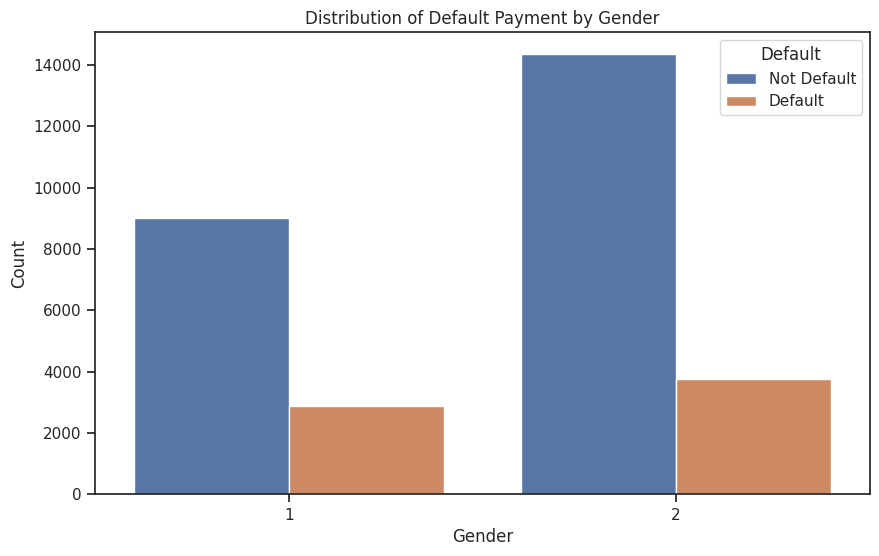

In [ ]:
#@title Exploring the data

# Map the Sex/Gender
sex_labels = {
    1: 'Male',
    2: 'Female'
            }

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SEX', hue='default.payment.next.month')
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.xticks(ticks=range(2), labels=[sex_labels.get(i, 'Female') for i in range(2)])  # Update x-axis labels
plt.title('Distribution of Default Payment by Gender')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()




In [ ]:
#@title Select All Raw Key Features (No Aggregates)

# Include LIMIT_BAL, PAY_0 to PAY_6, BILL_AMT1 to 6, PAY_AMT1 to 6, and demographic data
raw_features = [
    'LIMIT_BAL',

    # Payment history status
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',

    # Monthly bill amounts
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',

    # Monthly payment amounts
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',

    # Demographic features
    'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'
]

# Define the target variable
target = 'default.payment.next.month'

# Prepare feature matrix and target vector
X = df[raw_features]
y = df[target]


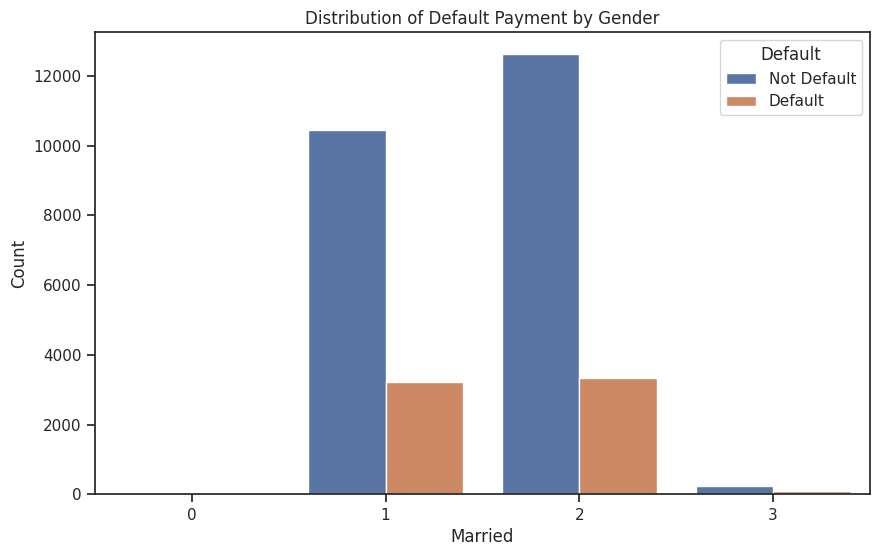

In [ ]:
marriage_labels = {
    1: 'Married',
    2: 'Single',
    3: 'Other'
            }

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MARRIAGE', hue='default.payment.next.month')
plt.xlabel('Married')
plt.ylabel('Count')
#plt.xticks(ticks=range(2), labels=[sex_labels.get(i, 'Female') for i in range(2)])  # Update x-axis labels
plt.title('Distribution of Default Payment by Gender')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()



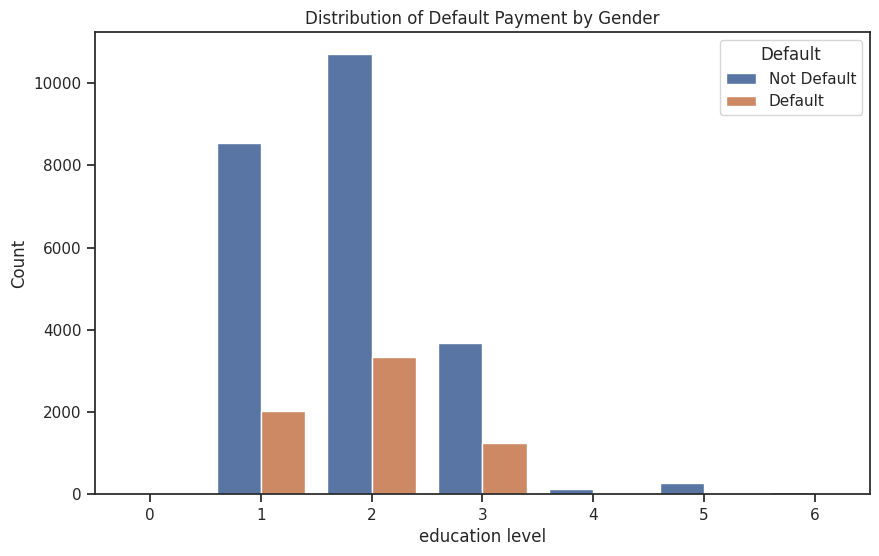

In [ ]:
education_labels = {
    1: 'High',
    2: 'Uni',
    3: 'Grad',
    4: 'Other',
    5: 'Dunno',
    6: 'Dunno'
            }

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EDUCATION', hue='default.payment.next.month')
plt.xlabel('education level')
plt.ylabel('Count')
#plt.xticks(ticks=range(2), labels=[sex_labels.get(i, 'Female') for i in range(2)])  # Update x-axis labels
plt.title('Distribution of Default Payment by Gender')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()



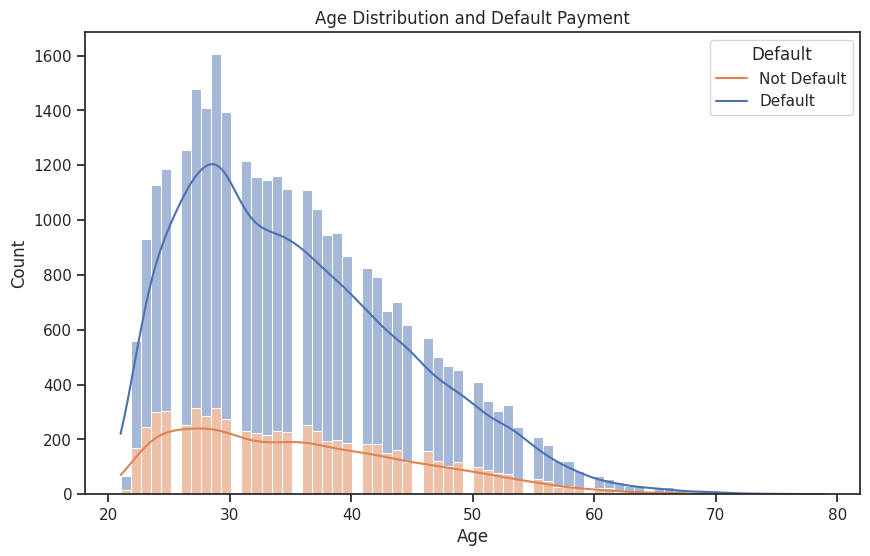

In [ ]:
# Create a Age distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', hue='default.payment.next.month', multiple='stack', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution and Default Payment')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()



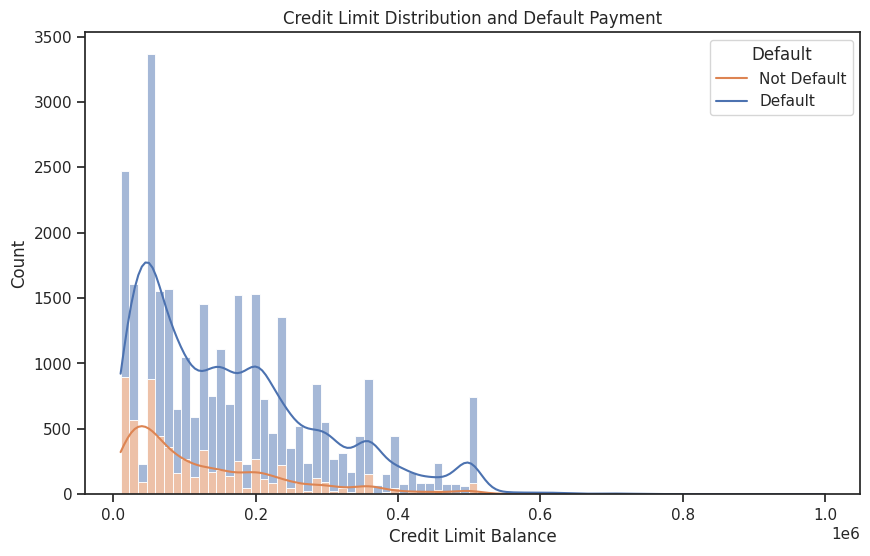

In [ ]:
# Create a Credit Limit distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LIMIT_BAL', hue='default.payment.next.month', multiple='stack', kde=True)
plt.xlabel('Credit Limit Balance')
plt.ylabel('Count')
plt.title('Credit Limit Distribution and Default Payment')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()


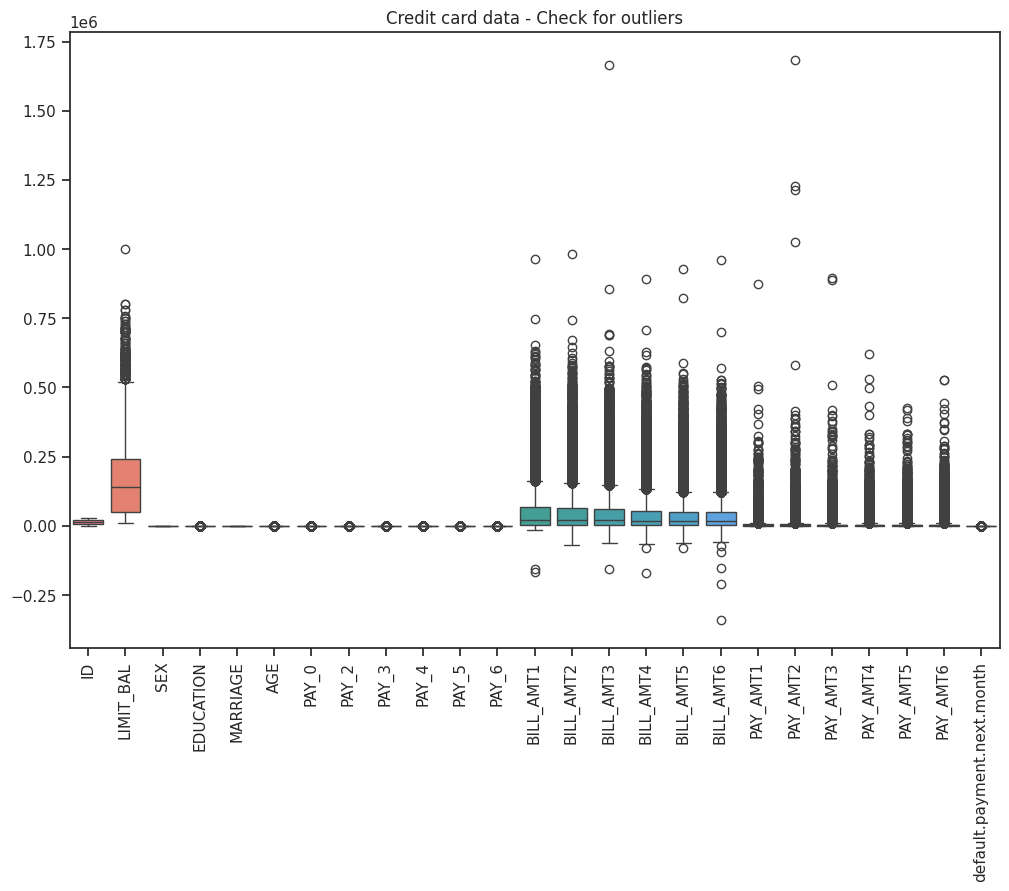

Percentage of outliers in each feature:
 ID                            0.000000
LIMIT_BAL                     0.433333
SEX                           0.000000
EDUCATION                     1.103333
MARRIAGE                      0.000000
AGE                           0.470000
PAY_0                         0.470000
PAY_2                         0.523333
PAY_3                         0.500000
PAY_4                         0.563333
PAY_5                         0.546667
PAY_6                         0.430000
BILL_AMT1                     2.286667
BILL_AMT2                     2.233333
BILL_AMT3                     2.203333
BILL_AMT4                     2.266667
BILL_AMT5                     2.170000
BILL_AMT6                     2.170000
PAY_AMT1                      1.300000
PAY_AMT2                      1.023333
PAY_AMT3                      1.206667
PAY_AMT4                      1.320000
PAY_AMT5                      1.380000
PAY_AMT6                      1.463333
default.payment.next.mo

In [ ]:
#@title Check for outliers
# Visualize the distribution of each feature using box plots

sns.set(style="ticks")
plt.figure(figsize=(12, 8))
plt.title('Credit card data - Check for outliers')
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()
# Calculate z-scores for each feature
z_scores = (df - df.mean()) / df.std()
# Identify outliers based on z-score threshold (e.g., 3 or 4)
outliers = (z_scores > 3) | (z_scores < -3)
# Calculate the percentage of outliers for rach feature
outlier_percentage = (outliers.sum() / len(df)) * 100
print('Percentage of outliers in each feature:\n', outlier_percentage )


In [ ]:
print("Null Values in Each Column:")
print(df.isnull().sum())

# Display the total count of null values in the entire DataFrame
print("\nTotal Null Values in the DataFrame:")
print(df.isnull().sum().sum())

Null Values in Each Column:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Total Null Values in the DataFrame:
0


In [ ]:
duplicates = df[df.duplicated()]

# Print the duplicate rows (if any)
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No Duplicate Rows Found.")

No Duplicate Rows Found.


In [ ]:
if df.isnull().any().any() == True:
  print('1')
else:
  print('2')

2


🧾 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2    

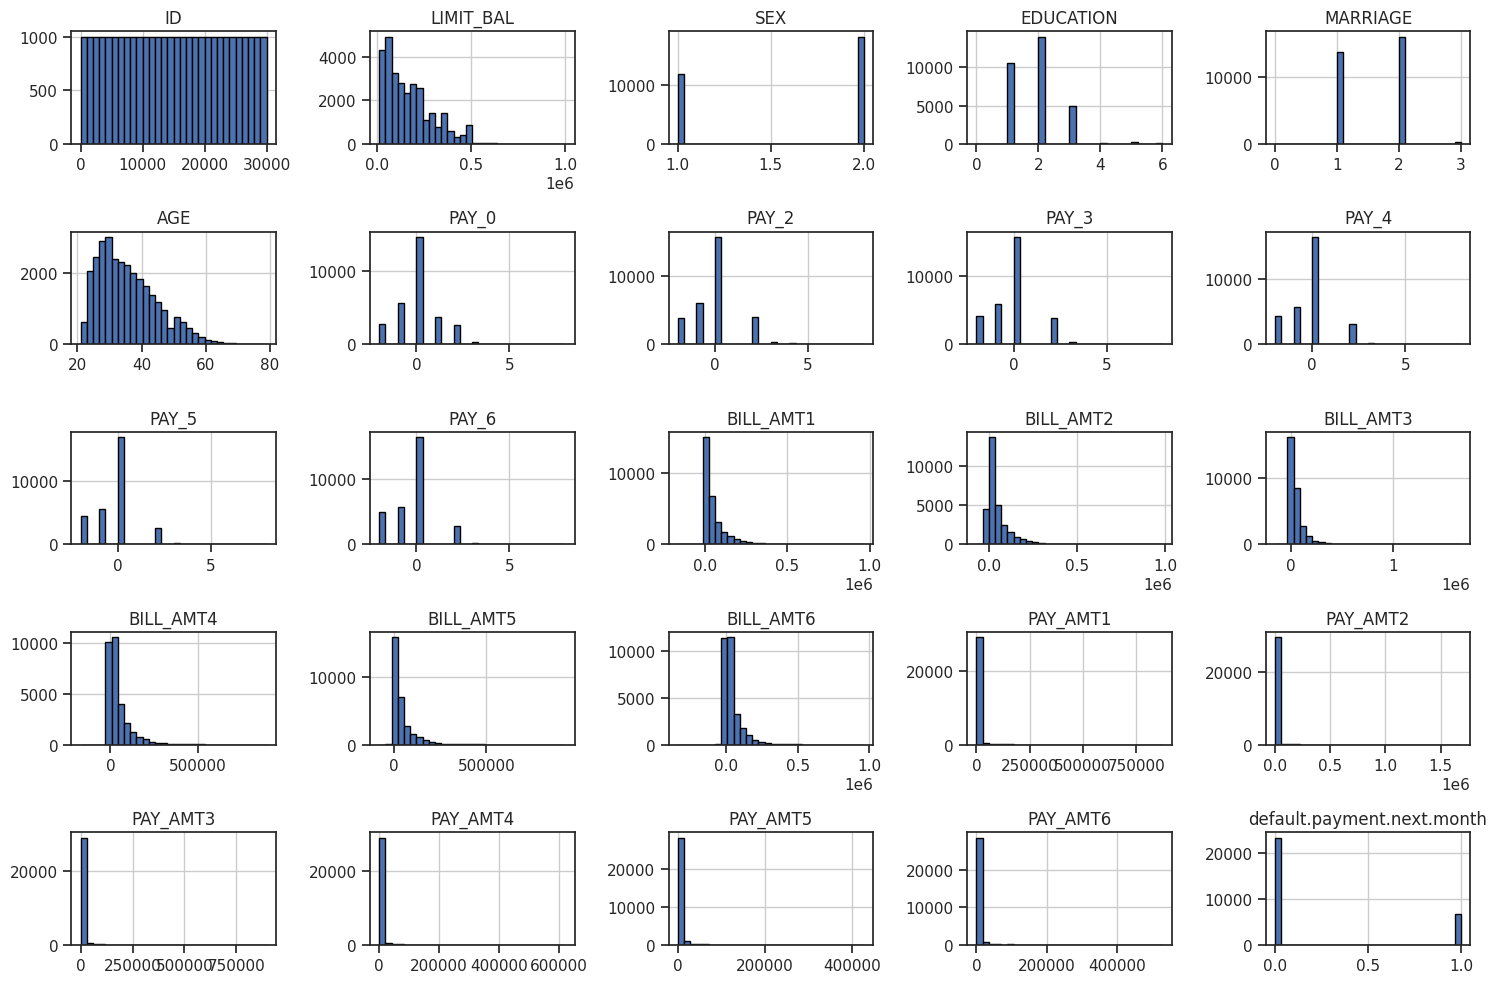


🔗 Correlation Matrix:


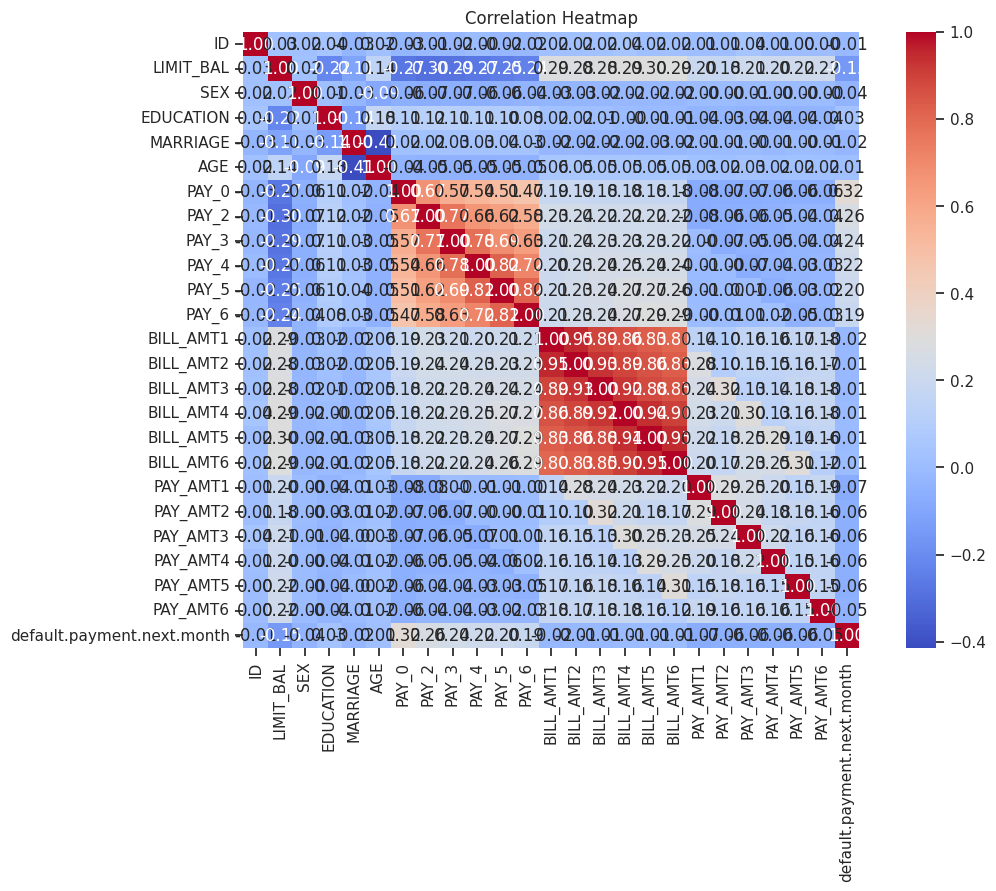

In [ ]:
# Basic overview of the dataset
print("🧾 DataFrame Info:")
print(df.info())
print("\n📊 Summary Statistics:")
print(df.describe())

# Check for missing values
print("\n❗ Missing Values:")
print(df.isnull().sum())

# Visualize distributions of all numeric features
print("\n📈 Distributions:")
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

# Correlation heatmap
print("\n🔗 Correlation Matrix:")
corr = df.corr(numeric_only=True)  # Avoid warning in case of categorical columns
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Boxplots to compare distributions across a target variable
# (uncomment and replace 'target' and 'numeric_column' if needed)
# sns.boxplot(x='target', y='numeric_column', data=df)
# plt.title("Distribution by Target")
# plt.show()


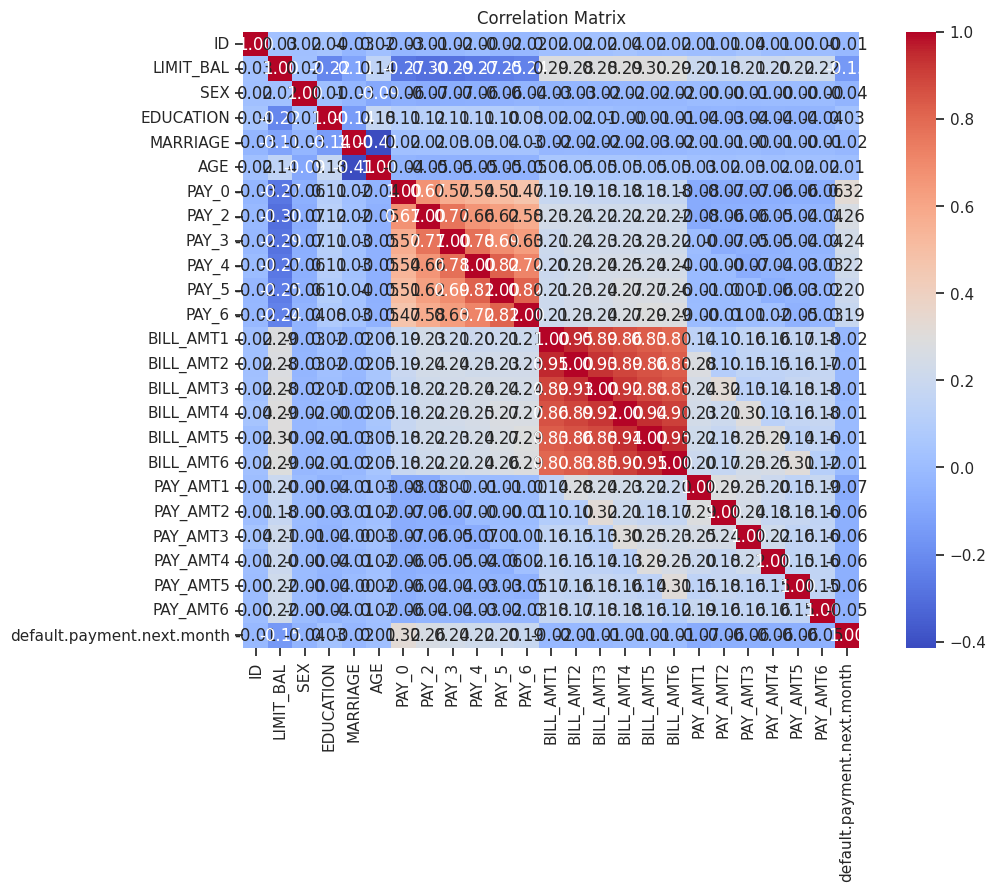

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric features only
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


📊 Correlation with target variable:
default.payment.next.month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                   

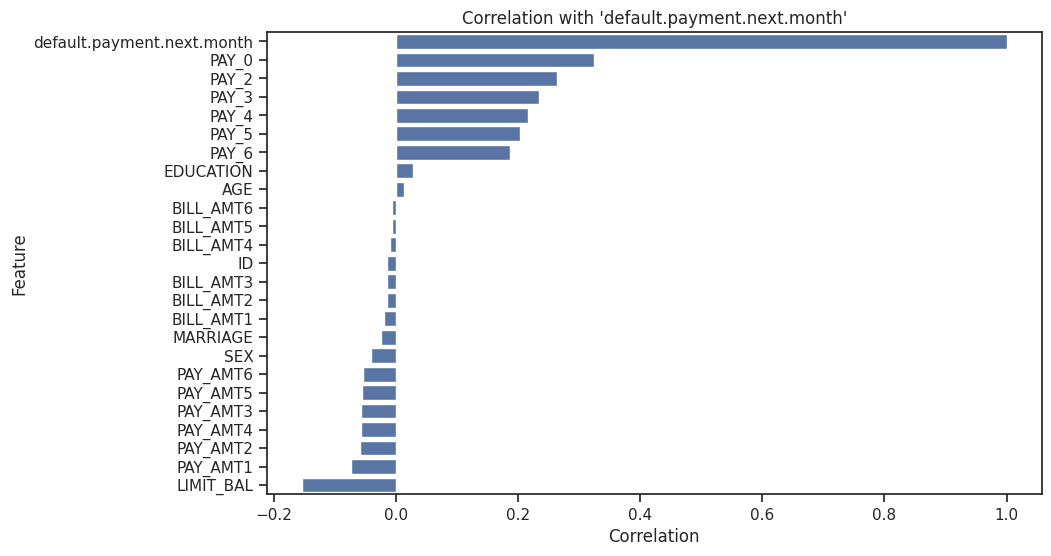

In [ ]:
target_col = 'default.payment.next.month'

# Get correlations with target variable
corr_with_target = df.corr(numeric_only=True)[target_col].sort_values(ascending=False)

print("📊 Correlation with target variable:")
print(corr_with_target)

# Optional bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title(f"Correlation with '{target_col}'")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Select top N features based on correlation (excluding the target itself)
top_features = corr_with_target.drop(target_col).abs().sort_values(ascending=False).head(10).index.tolist()

# Split into X and y
X = df[top_features]
y = df[target_col]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], dtype='object')


In [ ]:
df_no_selected_features = df.drop(columns=selected_features)

In [ ]:
#@title Standardizing the data

# Standardizing is needed as most clustering techniques depend on distance measures and hence differently scaled features can skew their importance
sc = StandardScaler() # Create scaler object
std_X = sc.fit_transform(X) # Apply to data. Note: an array is returned
X = pd.DataFrame(data=std_X, columns=X.columns) # Convert array back to DataFrame

Adjusted Threshold Evaluation (threshold = 0.30):
Accuracy: 0.6273
Precision: 0.5911
Recall: 0.8262
F1 Score: 0.6891
Train Accuracy: 0.9808
Test Accuracy: 0.6273
Precision: 0.5911
Recall: 0.8262
F1 Score: 0.6891


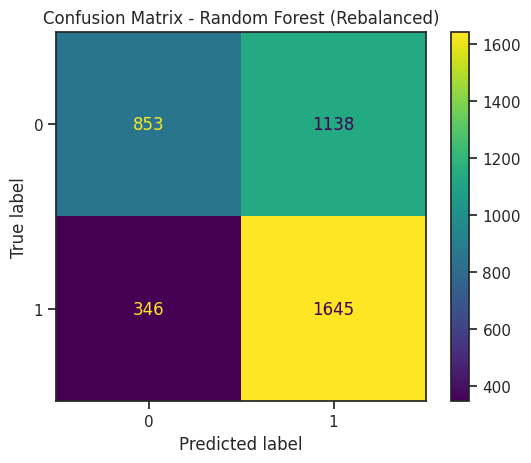

In [ ]:
#@title Building the Random Forest Model

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# STEP 1: Rebalance the dataset
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)


# STEP 2: Train-test split on rebalanced data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, stratify=y_res, random_state=42
)

# STEP 3: Train Random Forest with balanced class weights
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# STEP 4: Predictions

# Predict on training data for accuracy comparison
y_hat_rf = rf.predict(X_train)

# Get predicted probabilities for class 1 (default = 1)
y_probs = rf.predict_proba(X_test)[:, 1]

# Set a custom classification threshold (e.g., 0.7)
threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

# Evaluate using threshold-adjusted predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Adjusted Threshold Evaluation (threshold = {:.2f}):".format(threshold))
print("Accuracy:", round(accuracy_score(y_test, y_pred_thresh), 4))
print("Precision:", round(precision_score(y_test, y_pred_thresh), 4))
print("Recall:", round(recall_score(y_test, y_pred_thresh), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_thresh), 4))


# STEP 5: Evaluation
accuracy = accuracy_score(y_test, y_pred_thresh)
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)

print("Train Accuracy:", round(accuracy_score(y_train, y_hat_rf), 4))
print("Test Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thresh)
plt.title('Confusion Matrix - Random Forest (Rebalanced)')
plt.show()

# Log to results table
new_result = pd.DataFrame([{
    'Model': 'Random Forest (Rebalanced + Weighted)',
    'F1 score': f1,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}])

try:
    results = pd.concat([results, new_result], ignore_index=True)
except NameError:
    results = new_result


In [ ]:
# Step 1: Get feature importances from the trained model
import numpy as np

feature_importances = rf.feature_importances_
feature_names = X.columns

# Step 2: Select top N features (e.g., top 10)
top_n = 10
top_indices = np.argsort(feature_importances)[-top_n:]
top_features = feature_names[top_indices].tolist()

print("Top features selected:", top_features)

# Step 3: Recreate X using only those top features
X_top = df[top_features]

# Step 4: Re-split and retrain model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

rf_top = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_top.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred_top = rf_top.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", round(accuracy_score(y_test, y_pred_top), 4))
print("Precision:", round(precision_score(y_test, y_pred_top), 4))
print("Recall:", round(recall_score(y_test, y_pred_top), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_top), 4))


Top features selected: ['PAY_4', 'PAY_5', 'PAY_6', 'PAY_3', 'PAY_2', 'PAY_0', 'LIMIT_BAL', 'PAY_AMT4', 'PAY_AMT1', 'PAY_AMT2']
Accuracy: 0.7983
Precision: 0.5543
Recall: 0.4006
F1 Score: 0.4651


Train Accuracy: 0.9752
Test Accuracy: 0.7983
F1 Score: 0.7859


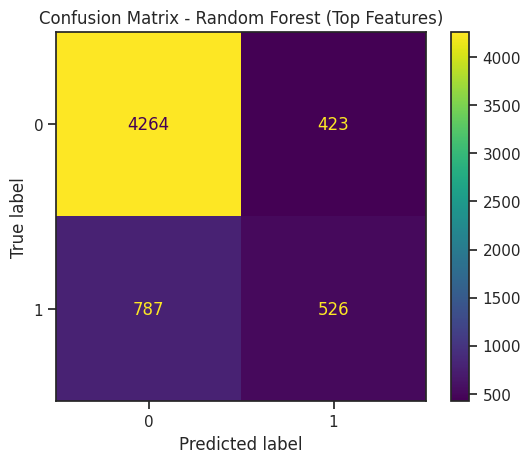

Accuracy: 0.7983
Precision: 0.5543
Recall: 0.4006
F1 Score: 0.7859


In [ ]:
# Step 1: Restrict X to only the top features
X_top = df[top_features]  # Use top_features from your importance ranking
y = df['default.payment.next.month']  # Or whatever your target column is

# Step 2: Split the data again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Step 3: Train a new Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Step 4: Make predictions on both sets
y_hat_rf = rf.predict(X_train)  # Training set
y_pred_rf = rf.predict(X_test)  # Testing set

# Step 5: Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

print("Train Accuracy:", round(accuracy_score(y_train, y_hat_rf), 4))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_rf, average="weighted"), 4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix - Random Forest (Top Features)")
plt.show()

# Detailed metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average="weighted")

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

# Step 6: Record results
new_result = pd.DataFrame([{
    'Model': 'Random Forest (Top Features)',
    'F1 score': f1,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}])

try:
    results = pd.concat([results, new_result], ignore_index=True)
except NameError:
    results = new_result


Train Accuracy: 0.9752
Test Accuracy: 0.7983
F1 Score: 0.8108


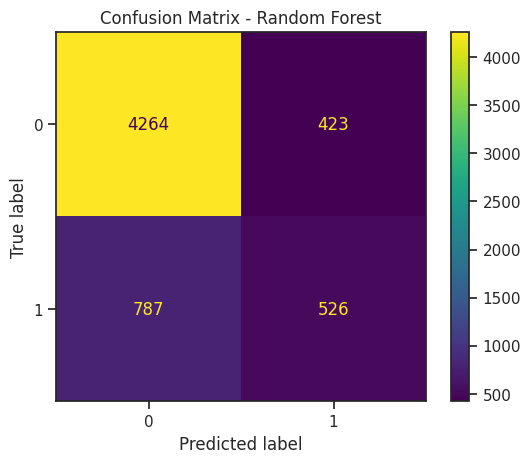

Accuracy: 0.7983
Precision: 0.5543
Recall: 0.4006
F1 Score: 0.8108


In [ ]:
#@title Calculate the accuracy for the Random Forest Model

# Compute training and test accuracy
print("Train Accuracy:", round(metrics.accuracy_score(y_train, y_hat_rf),4))
print("Test Accuracy:", round(metrics.accuracy_score(y_test, y_pred_rf),4))
print("F1 Score:", round(metrics.f1_score(y_pred_rf, y_test, average="weighted"),4))

# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_rf)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title ('Confusion Matrix - Random Forest')
plt.show()
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", round(accuracy,4))
# Calculate the precision
precision = precision_score(y_test, y_pred_rf)
print("Precision:", round(precision,4))
# Calculate the recall
recall = recall_score(y_test, y_pred_rf)
print("Recall:", round(recall,4))
f1 = metrics.f1_score(y_pred_rf, y_test, average="weighted")
print ('F1 Score:', round(f1,4))

# Save the results in a table
new_result = pd.DataFrame([{
    'Model': 'Decision Tree',
    'F1 score': f1,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}])

try:
    results = pd.concat([results, new_result], ignore_index=True)
except NameError:
    results = new_result
